In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('uber.csv')

In [5]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)
df.dropna(inplace=True)

<Axes: ylabel='fare_amount'>

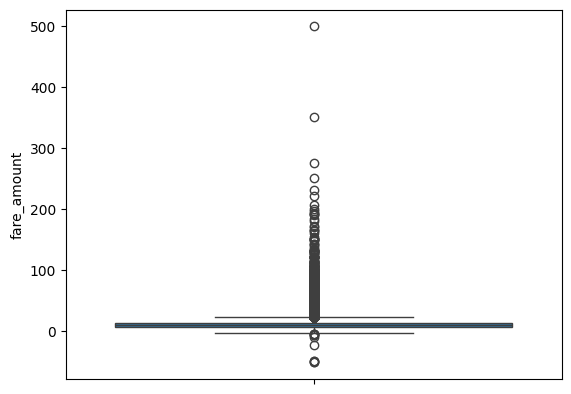

In [6]:
sns.boxplot(df['fare_amount'])

In [7]:
df['Waiting Time'] = np.random.randint(1,41,size=len(df)) # addition of extra column having range of values 
df                                           # between 1 to 41 and rows equal to rows in original dataframe

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Waiting Time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,9
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,30
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,12
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,27
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,36
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,25
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,27
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,31


In [8]:
low = df['fare_amount'].quantile(0.05) #0.05 ke peeche ka is outlier
high = df['fare_amount'].quantile(0.95) #0.95 ke aage ka is outlier

df = df[(df['fare_amount'] > low) & (df['fare_amount'] < high)]

<Axes: ylabel='fare_amount'>

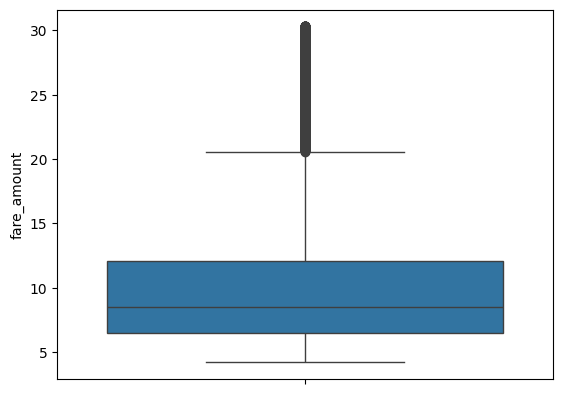

In [9]:
sns.boxplot(df['fare_amount'])

<Axes: >

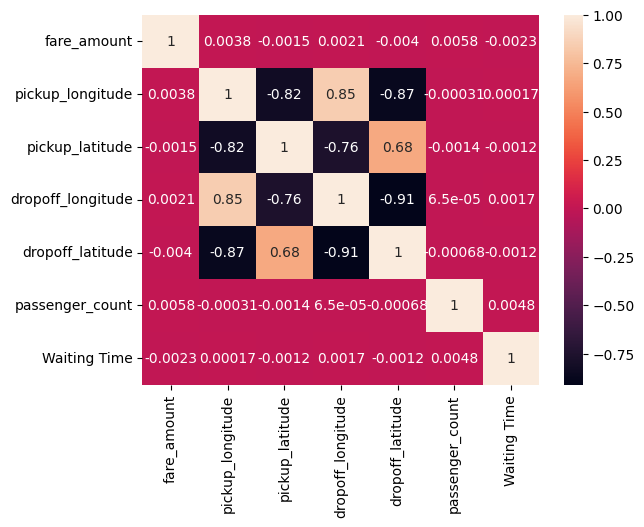

In [10]:
corr = df.corr()  #checking correlation b/w columns
sns.heatmap(corr, annot=True)

In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split #model_selection is class which has train_test_split
X = df.drop(['fare_amount'], axis=1)   # x stands for all other cols other than fare_amount       
y = df['fare_amount']       # y stands for fare_amount/ Price as asked in question
X_train, x_test, y_train, y_test = train_test_split(X, y) #Dividing the dataset into training and testing dataset


In [12]:
from sklearn.linear_model import LinearRegression #linear_model is class which has Linear regression model
model = LinearRegression()    # store linear regression model in "model"
model.fit(X_train, y_train)   #for fitting we use traning data only
y_pred = model.predict(x_test) #finding y predicted from x test

In [13]:
from sklearn.metrics import mean_squared_error,r2_score  #metrics all these are
RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) #(y_test,y_pred) 
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  5.135067823215528
R2 ->  -6.345210217295616e-05


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test) # hence val stored in variable called y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)